In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.svm import SVC

3 types of problems (prediction problem)
- classification: which category does the item belong (discrete target variable)
- regression: how changes in independent variable affect the dependent variable (continuous target variable)
- clustering: (will not be covered because dataset will not have target variable, unable to train)

We may split data into 'k' folds, train with 'k-1' portion & test with the rest of it

### Case Study: Classification with k-Nearest Neighbors

#### Problem: Pumpkin seed Classification
- The goal is to build a model to predict which class does any arbitrary seed belong to and validate the model. These classes reflect the type of pummpkin seed.
- Total number of classes - There are two important types of seeds, "Urgup Sivrisi" and "Cercevelik"
- Working with discrete target variables => classification problem

In [4]:
# read dataset (NOTE: our data is an xlsx file)
seed_data = pd.read_excel("Pumpkin_Seeds_Dataset (1).xlsx")

print(seed_data.head())

    Area  Perimeter  Major_Axis_Length  Minor_Axis_Length  Convex_Area  \
0  56276    888.242           326.1485           220.2388        56831   
1  76631   1068.146           417.1932           234.2289        77280   
2  71623   1082.987           435.8328           211.0457        72663   
3  66458    992.051           381.5638           222.5322        67118   
4  66107    998.146           383.8883           220.4545        67117   

   Equiv_Diameter  Eccentricity  Solidity  Extent  Roundness  Aspect_Ration  \
0        267.6805        0.7376    0.9902  0.7453     0.8963         1.4809   
1        312.3614        0.8275    0.9916  0.7151     0.8440         1.7811   
2        301.9822        0.8749    0.9857  0.7400     0.7674         2.0651   
3        290.8899        0.8123    0.9902  0.7396     0.8486         1.7146   
4        290.1207        0.8187    0.9850  0.6752     0.8338         1.7413   

   Compactness       Class  
0       0.8207  Çerçevelik  
1       0.7487  Çerçev

In [5]:
# size of data (2500 data entries)
print(seed_data.shape)

(2500, 13)


In [6]:
# see if dataset is balanced
# NOTE: wee see set1 has 1300 & set2 has 1200 (mostly balanced)
print(seed_data.Class.value_counts())

Class
Çerçevelik       1300
Ürgüp Sivrisi    1200
Name: count, dtype: int64


In [7]:
# see if there are any missing values in our dataset (data cleaning)
seed_data.isnull().sum()

Area                 0
Perimeter            0
Major_Axis_Length    0
Minor_Axis_Length    0
Convex_Area          0
Equiv_Diameter       0
Eccentricity         0
Solidity             0
Extent               0
Roundness            0
Aspect_Ration        0
Compactness          0
Class                0
dtype: int64

In [8]:
# are there any duplicated data? (data cleaning)
seed_data.duplicated().sum()

0

In [9]:
seed_data.describe()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,80658.220800,1130.279015,456.601840,225.794921,81508.084400,319.334230,0.860879,0.989492,0.693205,0.791533,2.041702,0.704121
std,13664.510228,109.256418,56.235704,23.297245,13764.092788,26.891920,0.045167,0.003494,0.060914,0.055924,0.315997,0.053067
min,47939.000000,868.485000,320.844600,152.171800,48366.000000,247.058400,0.492100,0.918600,0.468000,0.554600,1.148700,0.560800
25%,70765.000000,1048.829750,414.957850,211.245925,71512.000000,300.167975,0.831700,0.988300,0.658900,0.751900,1.801050,0.663475
50%,79076.000000,1123.672000,449.496600,224.703100,79872.000000,317.305350,0.863700,0.990300,0.713050,0.797750,1.984200,0.707700
75%,89757.500000,1203.340500,492.737650,240.672875,90797.750000,338.057375,0.897025,0.991500,0.740225,0.834325,2.262075,0.743500
max,136574.000000,1559.450000,661.911300,305.818000,138384.000000,417.002900,0.948100,0.994400,0.829600,0.939600,3.144400,0.904900


In [10]:
# encode non-numeric data (we need to work with numerical data for analysis
label_enc = preprocessing.LabelEncoder()

seed_data['Class'] = label_enc.fit_transform(seed_data['Class'])
seed_data.Class.value_counts()

Class
0    1300
1    1200
Name: count, dtype: int64

array([[<Axes: title={'center': 'Area'}>,
        <Axes: title={'center': 'Perimeter'}>,
        <Axes: title={'center': 'Major_Axis_Length'}>,
        <Axes: title={'center': 'Minor_Axis_Length'}>],
       [<Axes: title={'center': 'Convex_Area'}>,
        <Axes: title={'center': 'Equiv_Diameter'}>,
        <Axes: title={'center': 'Eccentricity'}>,
        <Axes: title={'center': 'Solidity'}>],
       [<Axes: title={'center': 'Extent'}>,
        <Axes: title={'center': 'Roundness'}>,
        <Axes: title={'center': 'Aspect_Ration'}>,
        <Axes: title={'center': 'Compactness'}>],
       [<Axes: title={'center': 'Class'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

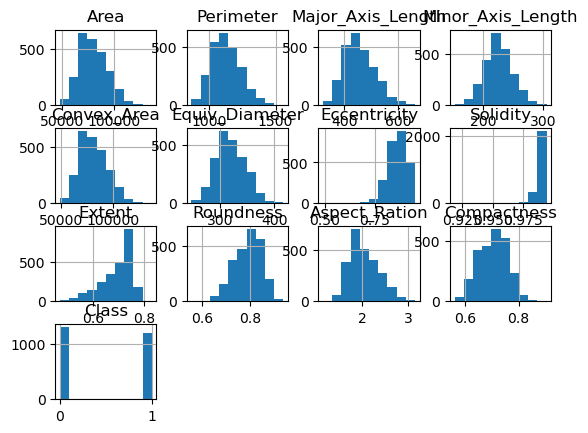

In [11]:
#fig = plt.figure(figsize=(15,20))
#ax = fig.gca()
seed_data.hist()

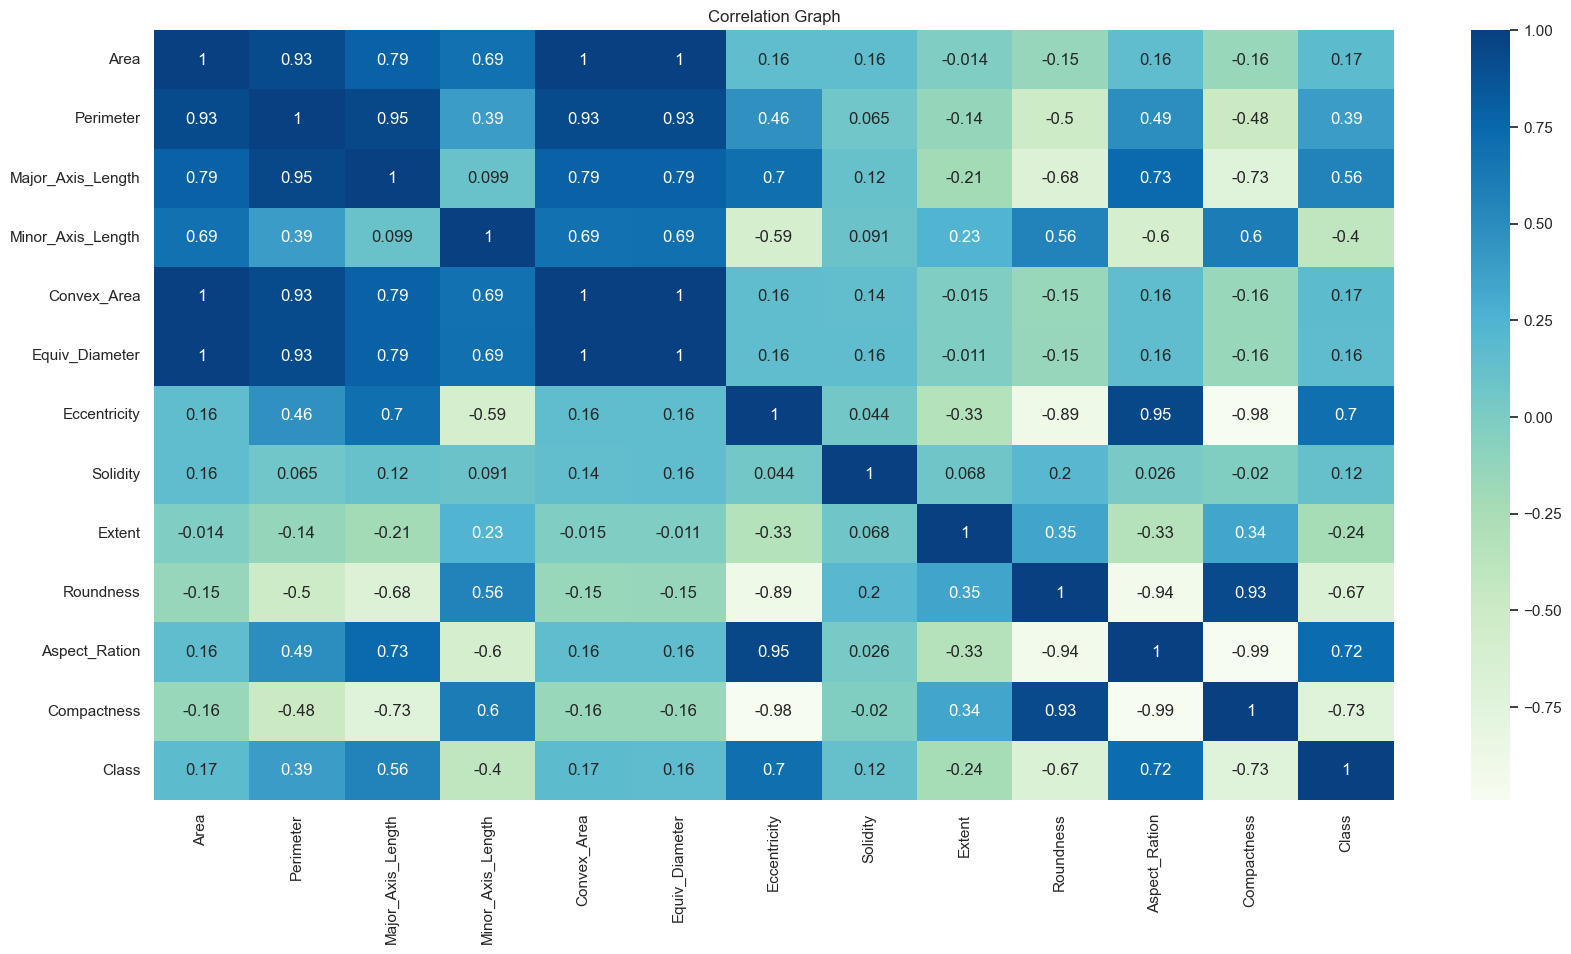

In [46]:
sns.set()
plt.figure(figsize = (20,10))
sns.heatmap(seed_data.corr(), cmap = 'GnBu', annot=True)
plt.title('Correlation Graph')
plt.show()

<Axes: >

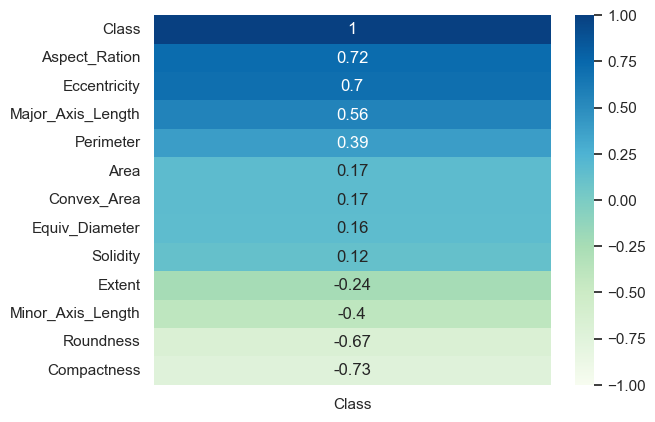

In [40]:
sns.heatmap(seed_data.corr()[["Class"]].sort_values(by='Class', ascending = False), annot = True, cmap='GnBu', vmin=-1,vmax=1)

In [24]:
X = seed_data.drop(['Class'], axis=1)
y = seed_data.Class
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [26]:
# test to see if the split worked
# NOTE: should be less values than the original set
y_train.value_counts()

Class
0    1052
1     948
Name: count, dtype: int64

In [30]:
scaler = preprocessing.StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)
X_train_sc[:5,]

array([[ 0.52926021,  0.36409567, -0.1857601 ,  1.16528829,  0.57757963,
         0.56535444, -0.8197908 , -1.95941396,  0.79896053,  0.27363227,
        -0.87561256,  0.86813821],
       [-1.59034793, -1.4664371 , -0.98134551, -1.66208365, -1.60228926,
        -1.69097017,  0.52072178,  0.42130285, -1.39602048, -0.08130479,
         0.31705236, -0.41467783],
       [ 1.08132794,  0.63234238,  0.29025068,  1.41029151,  1.10290237,
         1.08844261, -0.51723689, -0.67102604,  0.75208069,  0.75763736,
        -0.66864732,  0.62478046],
       [-1.81105855, -1.84826657, -1.38603609, -1.62533597, -1.82233638,
        -1.95554749,  0.14749834,  0.36528598, -0.47014367,  0.43138208,
        -0.09846284,  0.00978336],
       [-0.24737621, -0.17690978,  0.12659012, -0.57316032, -0.26198254,
        -0.21035581,  0.6201008 ,  0.70138718,  0.25147099, -0.08489001,
         0.44573213, -0.52598099]])

array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>,
        <Axes: title={'center': '2'}>],
       [<Axes: title={'center': '3'}>, <Axes: title={'center': '4'}>,
        <Axes: title={'center': '5'}>],
       [<Axes: title={'center': '6'}>, <Axes: title={'center': '7'}>,
        <Axes: title={'center': '8'}>],
       [<Axes: title={'center': '9'}>, <Axes: title={'center': '10'}>,
        <Axes: title={'center': '11'}>]], dtype=object)

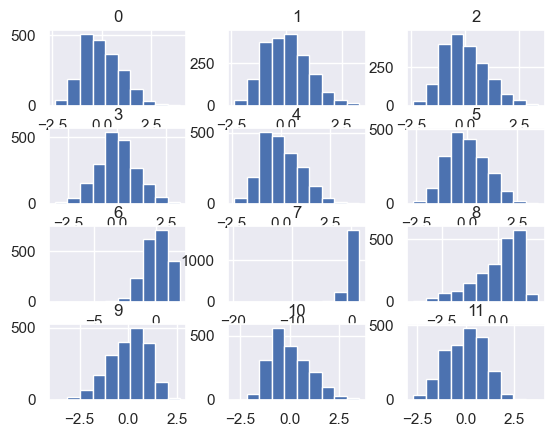

In [37]:
# missing
X_train_sc_pd = pd.DataFrame(X_train_sc)
X_train_sc_pd.hist()

In [34]:
# Model creation and training
knn = KNeighborsClassifier()
knn.fit(X_train_sc, y=y_train)

KNeighborsClassifier()

In [44]:
# Model evaluation
train_predict = knn.predict(X=X_train_sc)
test_predict = knn.predict(X=X_test_sc)
test_predict[:5]

array([0, 1, 1, 0, 1])